# **Examen final de Desarrollo de Aplicaciones para la Visualización de Datos**

Nombre: Alvaro

Apellidos: Olivie Molina

Tiempo: *2 horas y 30 minutos*

## **Contexto del ejercicio**

Un banco portugues desea entender en más detalle las campañas de marketing directo que ha realizado en los últimos meses a más de 40 mil clientes. Las campañas de marketing se basaron en llamadas telefónicas. Muchas veces era necesario más de un contacto con un mismo cliente, para saber si el producto (depósito bancario) sería ('sí') o no ('no') contratado.

El objetivo del análisis es buscar patrones para entender mejor que tipo de perfil tienen los clientes que han contratado el depósito para buscar en su base de datos otros clientes parecidos para aumentar la respuesta y el ROI de futuras campañas de marketing directo intentando vender el mismo depósito. Por lo tanto, se pide:

1.  Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes. (3 Puntos) (*)

2.  Montar un dashboard con al menos, 4 visualizaciones diferentes, que incluyan 2 componentes interactivas y 1 callback (5 Puntos) (*)

3. Concluir todo este análisis haciendo recomendaciones para la mejora de futuras campañas de contacto directo a partir de los resultados obtenidos de los análisis realizados con los datos. (2 Puntos)

Para realizar este análisis se provee de un juego de datos con las siguientes variables:

- age	- Edad (numérica)
- job - Ocupación (categórica)
- marital - Estado civil (categórica)
- education - Nivel educativo (categórica)
- default - ¿Tiene algún prestamo en default? (binaria)
- balance - Balance medio anual en euros (numérica)
- housing - ¿Tiene una hipoteca? (binaria)
- loan -  ¿Tiene un prestamo personal? (binaria)
- contact - Tipo de contacto (categórica)
- day_of_week - Último día de la semana que fue contactado (fecha)
- month - Último mes que fue contactado (fecha)
- duration - Duración de la última vez que fue contactado en segundos (entera)
- campaign - Número de veces que fue contactado (numérica)
- pdays - Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica; -1 significa que el cliente no fue contactado previamente)
- previous - Número de contactos realizados durante esta campaña y para este cliente (numérica, incluye el último contacto)
- poutcome - Resultado de la campaña de marketing anterior (categórica; 'failure','nonexistent','success')
- y - El cliente ha contratado el depósito (binaria, yes, no)

Recuerda, si tuvieras que programar una función, comenta los argumentos de entrada y salida. **Explica el orden que estás siguiendo a la hora de elegir las visualizaciones y comenta las conclusiones que vas sacando.**


**(*) IMPORTANTE**: Puedes elegir realizar un modelo de clasificación y realizar visualizaciones en torno a ese modelo en los primeros dos apartados. Esta parte no es obligatoria. El objetivo de la clasificación sería predecir si el cliente se suscribirá a un depósito bancario (variable y).








### **Librerías necesarias**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import dash
from dash import dcc
from dash import html
import plotly.express as px
from dash.dependencies import Input, Output


### **Análisis descriptivos**

In [4]:
data = pd.read_csv('bank-full.csv', sep=';')

print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


C:\Users\aolivie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\aolivie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\aolivie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\aolivie\AppData\Local\Packages\PythonSoftwareFoundation.Python.

Text(0.5, 1.0, 'Call Duration by Y')

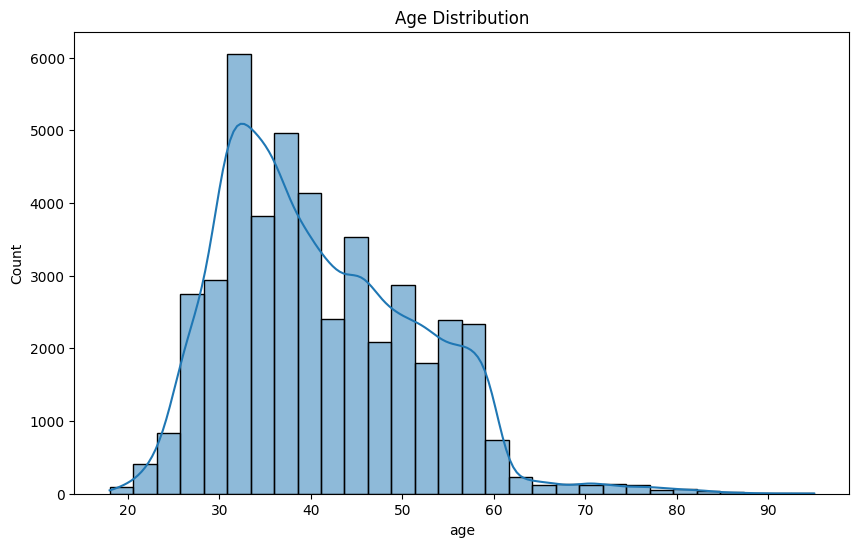

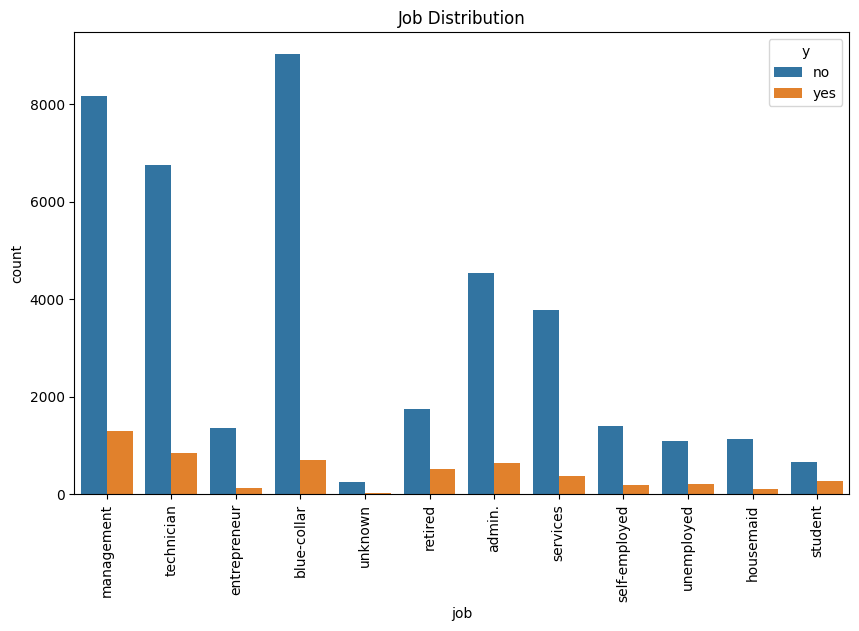

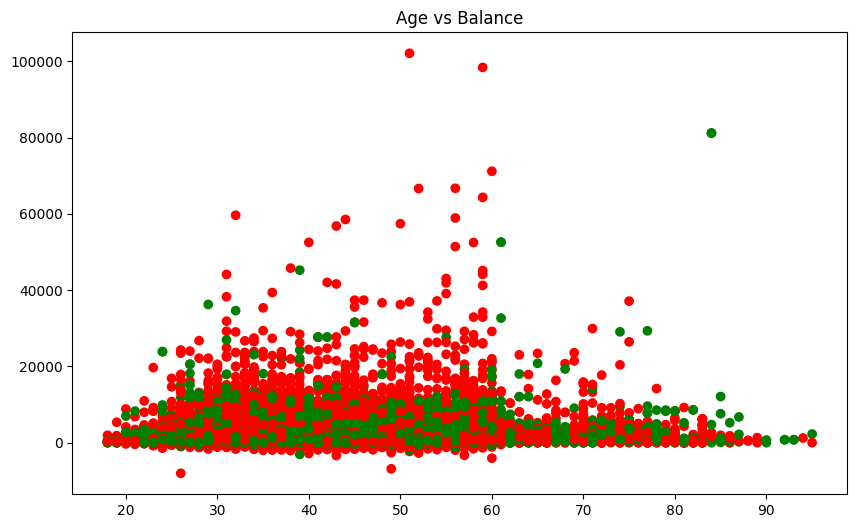

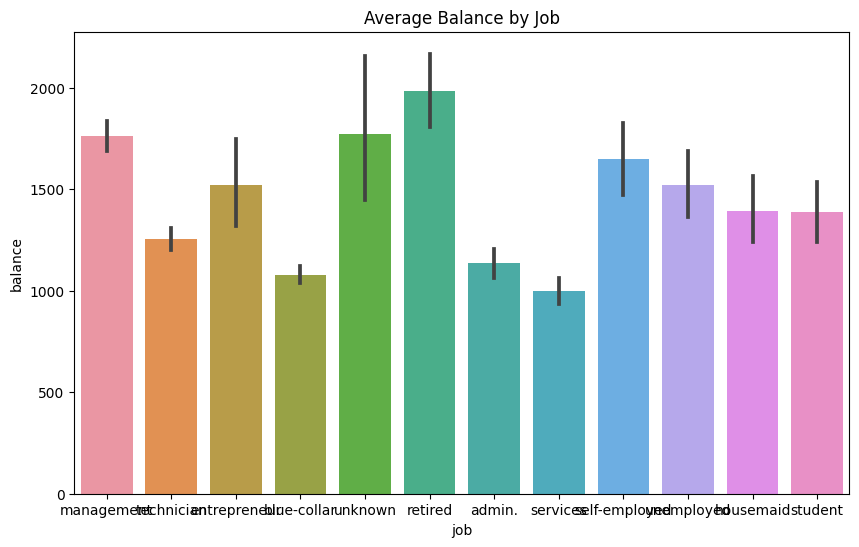

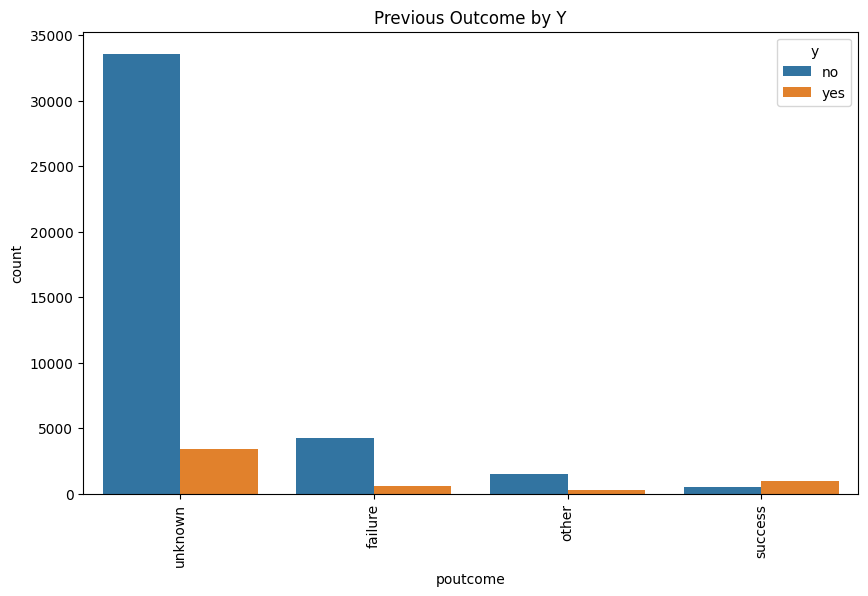

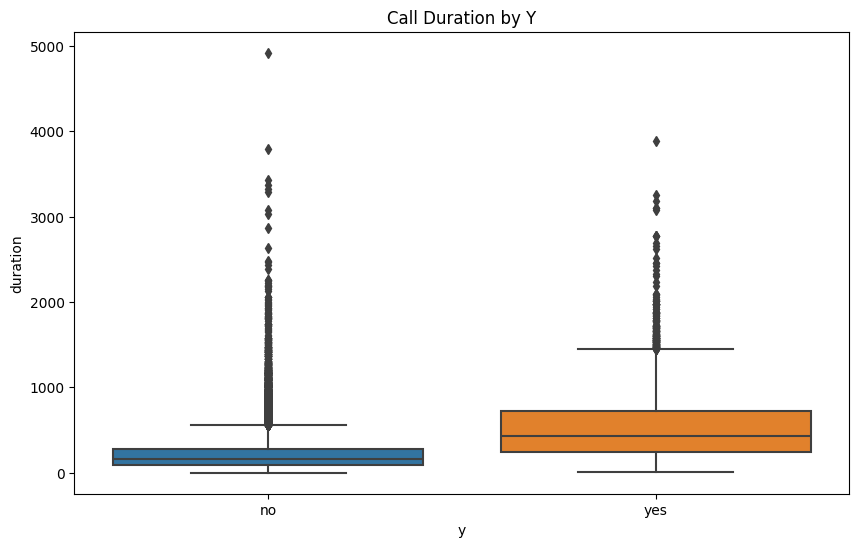

C:\Users\aolivie\AppData\Local\Temp\ipykernel_8588\2729286820.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='y', data=data)
plt.title('Job Distribution')
plt.xticks(rotation=90)

plt.figure(figsize=(10,6))
plt.scatter(data['age'], data['balance'], color=data['y'].map({'no':'red', 'yes':'green'}))
plt.title('Age vs Balance')

plt.figure(figsize=(10,6))
sns.barplot(x='job', y='balance', data=data)
plt.title('Average Balance by Job')

plt.figure(figsize=(10,6))
sns.countplot(x='poutcome', hue='y', data=data)
plt.title('Previous Outcome by Y')
plt.xticks(rotation=90)

plt.figure(figsize=(10,6))
sns.boxplot(x='y', y='duration', data=data)
plt.title('Call Duration by Y')




### **Dashboard**

In [74]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def logistic_regression(df):
    y = df['y']
    df = df.drop(['y', 'day','marital', 'age'], axis=1)
    X = pd.get_dummies(df)
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)
    coefficients = model.coef_[0]
    
    return coefficients, X.columns


In [84]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Dashboard', style={'textAlign': 'center', 'marginBottom': 30,}),
    html.Div([
                dcc.Dropdown(
                    id='job-dropdown',
                    options=[{'label': i, 'value': i} for i in data['job'].unique()],
                    value=[data['job'].unique()[0]],
                    style={'width': '80%', 'margin': 'auto'}
                )
            ], style={'textAlign': 'center', 'marginBottom': 20}),
    html.Div([
        dcc.Graph(id='log-coefs'),
        html.Div(
                style={
                    'display': 'grid',
                    'grid-template-rows': '50% 50%'
                },
                children=[
                    html.Div(
                        style={'grid-column': '1'},
                        children=[
                            dcc.Graph(
                                id='duration-y',
                                figure={}
                            )
                        ]
                    ),
                    html.Div(
                        style={'grid-column': '2'},
                        children=[
                            dcc.Graph(
                                id='poutcome-hist',
                                figure={}
                            )
                        ]
                    )
                ]
            ),
        dcc.Graph(id='age-y'),
    ]),
    ])

@app.callback(
    Output('log-coefs', 'figure'),
    Output('duration-y', 'figure'),
    Output('poutcome-hist', 'figure'),
    Output('age-y', 'figure'),
    Input('job-dropdown', 'value')
)
def update_plots(job):
    data = pd.read_csv('bank-full.csv', sep=';')
    filtered_data = data[data['job'] == job[0]]

    if filtered_data.shape[0] == 0:
        filtered_data = data[data['job'] == job]
    
    filtered_data.drop(['job'], axis=1, inplace=True)
    
    coefs, columns = logistic_regression(filtered_data)

    fig = px.bar(x=columns, y=coefs)
    fig.update_layout(transition_duration=500, title='Logistic Regression Coefficients: Variable importance')


    fig2 = px.scatter(filtered_data, x='duration', y='balance', color='y')
    fig2.update_layout(transition_duration=500, title='Duration vs Balance', xaxis_title='Duration', yaxis_title='Balance')

    fig3 = px.histogram(filtered_data, x='education', color='y')
    fig3.update_layout(title='Histogram of Education', xaxis_title='Education', yaxis_title='Count')

    fig4 = px.scatter(filtered_data, x='age', y='campaign', color='y')
    fig4.update_layout(title='Age vs Campaign', xaxis_title='Age', yaxis_title='Campaign')
    
    return fig, fig2, fig3, fig4

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\aolivie\AppData\Local\Temp\ipykernel_8588\2729286820.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aolivie\AppData\Local\Temp\ipykernel_8588\2729286820.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## *Conclusions*

With what we have seen from the two previous steps we can understand the need for personalized campaigns.

In the first step with the intial analisis we understand how the data is set up. We found a clear disproportion when looking at job types and found real patterns while looking at things like previous outcome. It is clear from this initial analysis that there will not be a one fit solution but each campaign must be adapted.

In the next step I decided to use a linear regression algorithim to determine wich characterisctics had a bigger effect on the outcome and what type of effect they had. From my previous data I had already ruled out age, martial status and day as key indicators due to their results from the initial analysis so I removed them from the algorithm. I decided to split the data by job type as I believe a different aproach is necesary for each job. There are some features that affect all the job types but others like education play different roles depending on the job type.

With that in mind it is clear that the result of the previous outcome greatly affects the next result which is to be expected. It was shocking how campaigns, according to the model, had little to no effect but when we plot it against age we see that the lower the number of campaigns, the higher the ammounts of yes which means that the marginal return of campaigns drops off at about 10. On the other hand, results improved with call duration which may show that less, but more informative, campaigns could increase results. 

Another key concept is that lower balance accounts are more likely to hire the service, this can bee seen when plotting against duration. The jobs feature is also very important as the proportion of yes and no is not constant. Students have the highest proportion out of all of them. Focusing on other jobs so as there might be more posible clients seems like a logical aproach.

In conclusion I would focus on job categories with a lot of clients but that have a low hire ratio like blue-collar. Then I would look at what features affect this job type. In this case it makes sense to get their contact information as that pulls down the hire chance and focusing on contacting people in the months that work like september. Also focusing on not campaigning to hard as that decreases the chance of a yes but making the calls that you do make, longer.